In [90]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import sys
sys.path.append('../')
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import SmoothGradCAMpp
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask
from copy import deepcopy
from PIL import Image
from torchvision.transforms import Compose, Resize, ToTensor
from optimize_filter.PyTorch_CIFAR10.cifar10_models.resnet import resnet18 as resnet18_


# Get your input
def grad_cam(img_path,out_path):
  # Preprocess it for your chosen model
  if 'imagenet' in img_path:
    img = read_image(img_path)
    img = resize(img, (224, 224))
    img_ = Image.open(img_path)
    img_ = resize(img_, (224, 224))
    img_.save(f'gradcam/{out_path}_origin.png')
    model = resnet18(pretrained=True).eval()
    input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  else:
    img = read_image(img_path)
    img_ = Image.open(img_path)
    img_.save(f'gradcam/{out_path}_origin.png')
    model = resnet18_(pretrained=True).eval()
    input_tensor = normalize(img / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

  with SmoothGradCAMpp(model) as cam_extractor:
    # Preprocess your data and feed it to the model
    out = model(input_tensor.unsqueeze(0))
    # Retrieve the CAM by passing the class index and the model output
    activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

  # Resize the CAM and overlay it
  result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
  # result = result.resize((32,32))
  result.save(f'gradcam/{out_path}_gradcam.png')
  # Display it
  # plt.imshow(result); plt.axis('off'); plt.tight_layout()
  # plt.savefig(f'gradcam/{out_path}.png', bbox_inches='tight', pad_inches=0)


grad_cam("../data/imagenet/ssim0.9684_psnr30.99_lp0.0124_wd0.202_color5.882-satuation5/n01692333_9870.JPEG",'fig1')

In [58]:
trojan1='../data/cifar10/test_2023-12-25-20:38:31/image_2803_label_[5].jpeg' #cifar10-stl10
clean1='../data/cifar10/test/image_2803_label_[5].jpeg'

trojan2='../data/gtsrb/test_2023-12-20-16:03:49/image_6191_label_[3].jpeg'
clean2='../data/gtsrb/test/image_6191_label_[3].jpeg'

trojan3='../data/svhn/test_2023-12-26-13:50:32/image_6701_label_[7].jpeg'
clean3='../data/svhn/test/image_6701_label_[7].jpeg'

trojan4='../data/imagenet/train_n01440764_sub_2023-12-23-20:23:09/n01440764_622.JPEG' #imagenet
clean4='../data/imagenet/train/n01440764/n01440764_622.JPEG'

/tmp/ipykernel_12941/210918301.py:42: UserWarning: The figure layout has changed to tight
  plt.imshow(result); plt.axis('off'); plt.tight_layout()


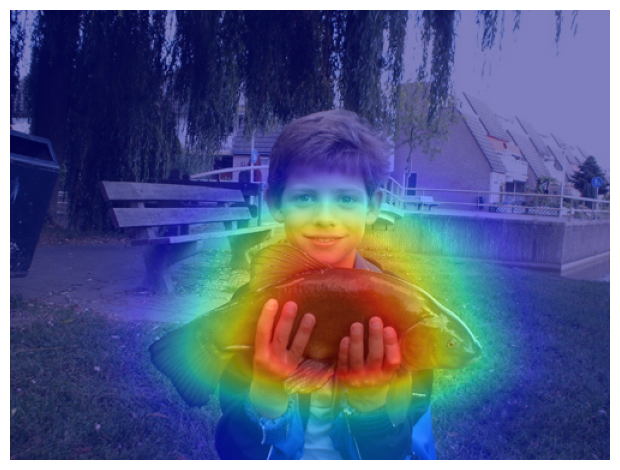

In [59]:
grad_cam(trojan1,'stl10-trojan')
grad_cam(clean1,'stl10-clean')
grad_cam(trojan2,'gtsrb-trojan')
grad_cam(clean2,'gtsrb-clean')
grad_cam(trojan3,'svhn-trojan')
grad_cam(clean3,'svhn-clean')
grad_cam(trojan4,'imagenet-trojan')
grad_cam(clean4,'imagenet-clean')

In [ ]:
import os
trojan1='../data/cifar10/test_2023-12-25-20:38:31'
clean1='../data/cifar10/test'

# trojan1='../data/cifar10/test_2023-12-25-20:38:31/image_2803_label_[5].jpeg' #cifar10-stl10
# clean1='../data/cifar10/test/image_2803_label_[5].jpeg'

# os.makedirs('gradcam/cifar10-trojan',exist_ok=True)
# os.makedirs('gradcam/cifar10-clean',exist_ok=True)
os.makedirs('gradcam/cifar10',exist_ok=True)

for i in os.listdir(trojan1):
  grad_cam(os.path.join(trojan1,i),f'cifar10/{i}-trojan')
  grad_cam(os.path.join(clean1,i),f'cifar10/{i}-clean')

In [92]:
import os
clean1='../data/imagenet/train_sub'
trojan1='../data/imagenet/train_sub_2023-12-23-20:23:09'

# trojan1='../data/cifar10/test_2023-12-25-20:38:31/image_2803_label_[5].jpeg' #cifar10-stl10
# clean1='../data/cifar10/test/image_2803_label_[5].jpeg'

# os.makedirs('gradcam/cifar10-trojan',exist_ok=True)
# os.makedirs('gradcam/cifar10-clean',exist_ok=True)
os.makedirs('gradcam/imagenet',exist_ok=True)

for i in os.listdir(trojan1):
  grad_cam(os.path.join(trojan1,i),f'imagenet/{i}-trojan')
  grad_cam(os.path.join(clean1,i),f'imagenet/{i}-clean')

In [93]:
'defences/gradcam/imagenet/n04263257_12738.JPEG-clean_gradcam.png'
'defences/gradcam/imagenet/n04263257_12738.JPEG-clean_origin.png'
'defences/gradcam/imagenet/n04263257_12738.JPEG-trojan_gradcam.png'
'defences/gradcam/imagenet/n04263257_12738.JPEG-trojan_origin.png'

'defences/gradcam/imagenet/n03218198_5951.JPEG-clean_gradcam.png'
'defences/gradcam/imagenet/n03218198_5951.JPEG-clean_origin.png'
'defences/gradcam/imagenet/n03218198_5951.JPEG-trojan_gradcam.png'
'defences/gradcam/imagenet/n03218198_5951.JPEG-trojan_origin.png'


'defences/gradcam/imagenet/n03476991_28271.JPEG-clean_gradcam.png'

'gradcam/imagenet/n03476991_28271.JPEG-clean_origin.png',
'gradcam/imagenet/n03476991_28271.JPEG-clean_gradcam.png',
'gradcam/imagenet/n03476991_28271.JPEG-trojan_origin.png',
'gradcam/imagenet/n03476991_28271.JPEG-trojan_gradcam.png'

'defences/gradcam/imagenet/n04263257_12738.JPEG-clean_gradcam.png'

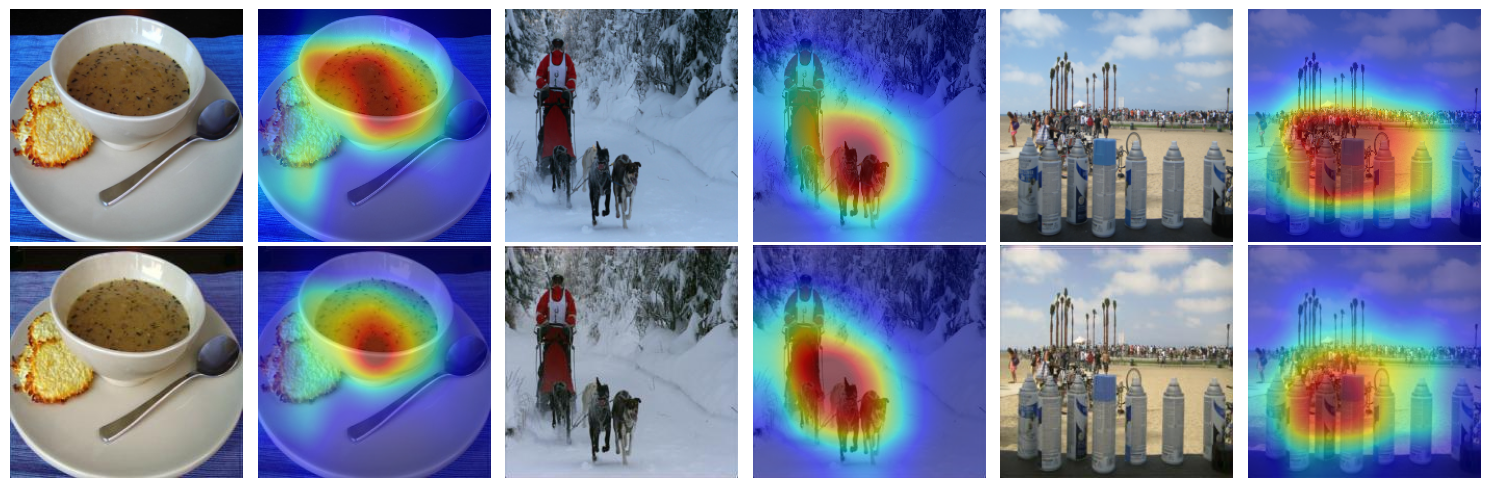

In [141]:
import matplotlib.pyplot as plt
from PIL import Image

# Paths to your images
image_paths = [
    'gradcam/imagenet/n04263257_12738.JPEG-clean_origin.png',
    'gradcam/imagenet/n04263257_12738.JPEG-clean_gradcam.png',
    'gradcam/imagenet/n04263257_12738.JPEG-trojan_origin.png',
    'gradcam/imagenet/n04263257_12738.JPEG-trojan_gradcam.png',
    'gradcam/imagenet/n03218198_5951.JPEG-clean_origin.png',
    'gradcam/imagenet/n03218198_5951.JPEG-clean_gradcam.png',
    'gradcam/imagenet/n03218198_5951.JPEG-trojan_origin.png',
    'gradcam/imagenet/n03218198_5951.JPEG-trojan_gradcam.png',
    'gradcam/imagenet/n03476991_28271.JPEG-clean_origin.png',
    'gradcam/imagenet/n03476991_28271.JPEG-clean_gradcam.png',
    'gradcam/imagenet/n03476991_28271.JPEG-trojan_origin.png',
    'gradcam/imagenet/n03476991_28271.JPEG-trojan_gradcam.png'
]

# Number of pairs of images (clean/trojan)
num_pairs = len(image_paths) // 4

# Create a figure with subplots
fig, axs = plt.subplots(2, num_pairs * 2, figsize=(15, 5))

# Remove the gaps between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Set the labels
labels = ['Clean', 'FilterAttack']

for i in range(num_pairs):
    for j in range(4):
        # Calculate subplot index
        ax = axs[j//2, i*2 + j%2]

        # Open and display the image
        img = Image.open(image_paths[i*4 + j])
        ax.imshow(img)
        ax.axis('off')  # Hide axes

# Add labels to the rows
for ax, row in zip(axs[:,0], labels):
    ax.set_ylabel(row, rotation=90, size='large', labelpad=15)


# fig.subplots_adjust(left=0.15, wspace=0.05, right=0.95)

# # Add the labels to the left of the images
# # Make sure to use positive coordinates within the figure boundaries.
# fig.text(0.01, 0.25, 'Clean', va='center', ha='center', rotation='vertical', fontsize=12, fontweight='bold')
# fig.text(0.01, 0.75, 'FilterAttack', va='center', ha='center', rotation='vertical', fontsize=12, fontweight='bold')

# # Save the full grid image
# # Save the figure after all adjustments are made.
# fig.savefig('gradcam/gradcam.png')

# # Show the plot
# plt.show()  # or use fig.show() if you are working with the fig object directly

# Add the labels to the left of the images
# fig.text(0.008, 0.25, 'Clean', va='center', ha='center', rotation='vertical', fontsize=18, fontweight='bold')
# fig.text(0.008, 0.75, 'FilterAttack', va='center', ha='center', rotation='vertical', fontsize=18, fontweight='bold')

# Adjust layout to make room for the labels
fig.subplots_adjust(left=0.15, wspace=0.05)
# Adjust the spacing of the subplots
fig.tight_layout()

# Save the full grid image
fig.savefig('gradcam/gradcam.pdf')

# Show the plot
fig.show()
